In [3]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from config.default import *


In [46]:
def get_green_center(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    green_mask = cv2.inRange(hsv, (30, 20, 20), (80, 255,255))


    cnts, hierarchy =cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    finger_countour = max(cnts, key = cv2.contourArea)
    moments = cv2.moments(finger_countour)

    if len(cnts) == 0 or max(moments.values()) < 0.1:
        print("No green found")
        return None
    cX = int(moments["m10"] / moments["m00"])
    cY = int(moments["m01"] / moments["m00"])
    return cX, cY

def draw_green(path):
    image = cv2.imread(os.path.join('resources', path))
    image = cv2.resize(image, settings["process_shape"])

    center = get_green_center(image)
    
    cv2.circle(image, center, 8, (0, 255, 0), -1)
    plt.imshow(image)
    plt.show()

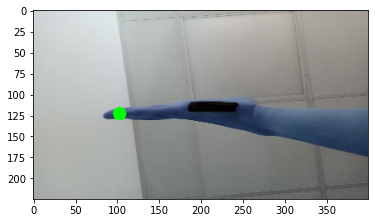

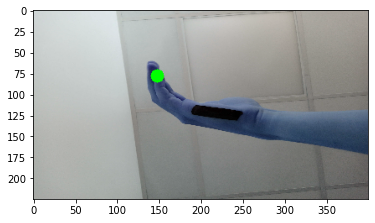

No green found


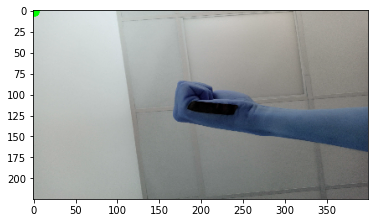

In [47]:
for img_path in filter(lambda name: 'fist' in name and name.endswith('.jpg'),  os.listdir('resources')):
    draw_green(img_path)